## Clusterização: agrupamento de clientes


## Aula 1 - Entendendo Aprendizado não-supervisionado

## Aula 2 - Obtendo os Clusters

### `Obtendo os dados`

In [1]:
import pandas as pd

df = pd.read_csv('./CC GENERAL.csv')
df.head()

/home/ike/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### `Organizando os dados`

In [2]:
# Retirando variavéis sem setido 
# 'Tenure' ao final da tabela é o tempo que o contrato de crédito demora para ser renovado
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [3]:
df.head(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182       95.4               0.0   
1  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222

In [4]:
df.shape

(8950, 16)

In [5]:
# Vericando valores nulos
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [6]:
# Subistituindo valores nulos pela mediana
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [7]:
# Normalizando os dados para que haja não haja tanta discrepancia nos dados
from sklearn.preprocessing import Normalizer
df_norm = df.copy()

df_norm = Normalizer().fit_transform(df_norm)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### `Executando Clustering`

In [8]:
# instanciando Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter= 300)
y_pred = kmeans.fit_predict(df_norm)

## Aula 3 - Entendendo os critérios e métricas de validação

### `Matemática do Silhouette`

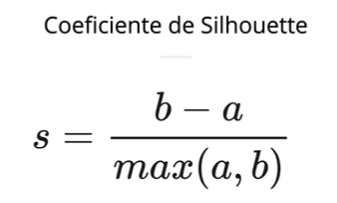

In [9]:
# Calculando silhueta
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(df_norm, labels, metric= 'euclidean')
print(silhouette)

0.36454259456819194


### Aula 4 - Entendendo e Calculando o Índice Davies-Bouldin

#### **Temos a fórmula de Davies-Bouldin**

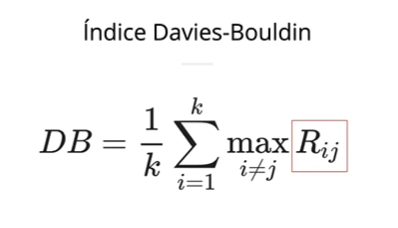

#### **'R' Evoca outra formula para ser calculado, e basicamente nos entrega uma medida de similaridade entre dois clusters, 'i' e 'j'.**

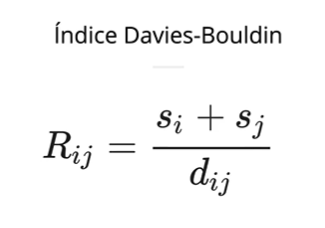

$s$ : Distancia média entre cada ponto do cluster e seu centroide para ter a **Similadirade dentro do cluster**

$d$ : Distancia entre os centroides dos clusters para ter a **Similadirade entre os clusters**

In [10]:
# Calculando o Davies-Bouldin

dbs = metrics.davies_bouldin_score(df_norm, labels)
dbs

1.0761660873408903

### Aula 5 - Entendendo e calculando o Índice Calinski Harabasz

##### Leva em consideração a disperção dos pontos dentro do cluster
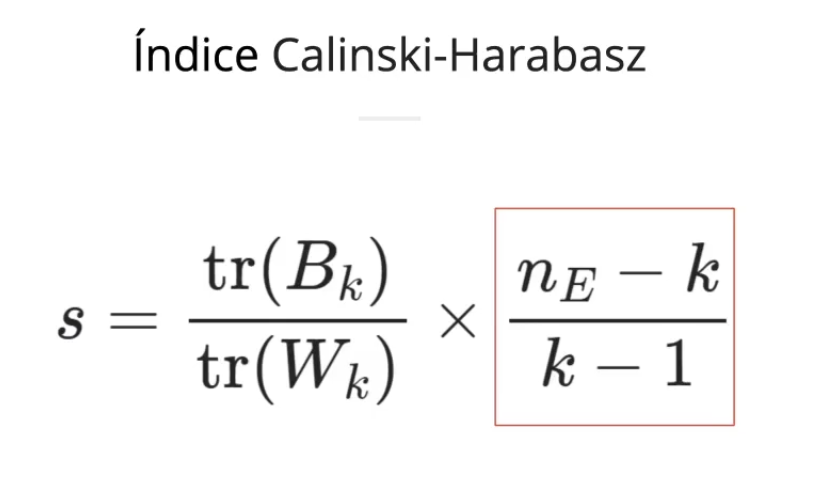

* $nE$ : numero de elementos dentro dos clusteres
* $Bk$ : dispersão entre (between) clusters
* $Wk$ : disperção dos elementos dentro (within) do cluster

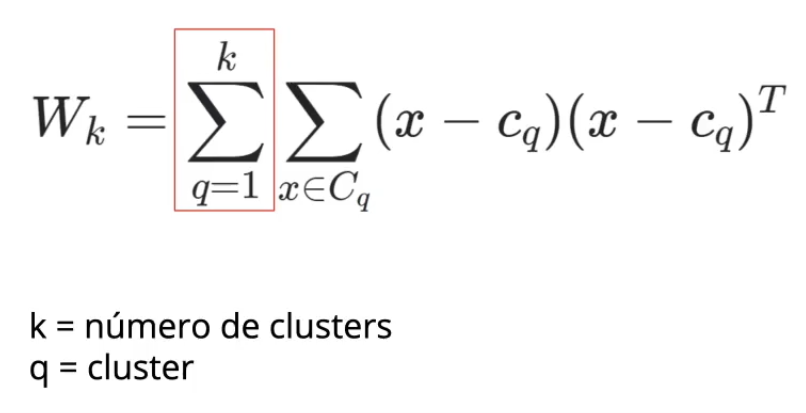


##### Ao final teremos 

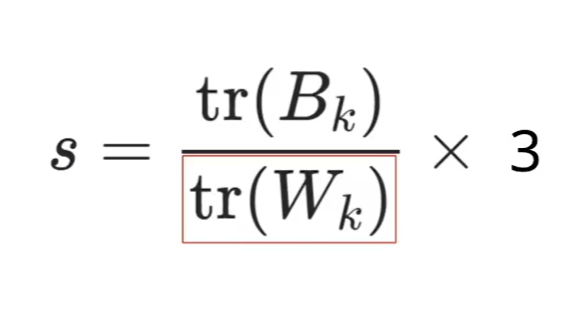


* $Tr$:é o traço, isto é, a soma de diagonais da matriz dos valores que obtemos. 

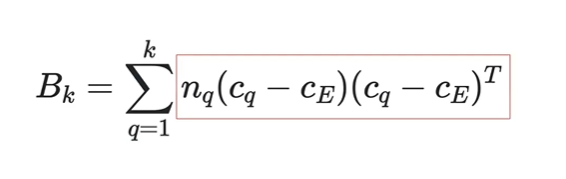

* $nq$: numero de elementos por cluster
* $cq$: centroide do cluster
* $ce$: centroide dos elementos

In [11]:
# Obtendo o Índice Calinski Harabasz com sckit-learn
calinsk = metrics.calinski_harabasz_score(df_norm, labels)
calinsk

3431.794224707802

In [12]:
print(f'As métricas achadas:\nSilhuette{round(silhouette,4),}\nDavies{round(dbs,4)}\nCalinsk{round(calinsk,4)}')

As métricas achadas:
Silhuette(0.3645,)
Davies1.0762
Calinsk3431.7942


## Aula 6 - Validando Clusters

###  `Validação relativa`

In [13]:
from sklearn.cluster import KMeans

def clustering_algorithm(n_clusters, dataset):
     kmeans = KMeans(n_clusters=n_clusters,n_init=10, max_iter=300)
     labels = kmeans.fit_predict(dataset)
     
     s = metrics.silhouette_score(dataset, labels, metric='euclidean')
     dbs = metrics.davies_bouldin_score(dataset,labels)
     calinsk = metrics.calinski_harabasz_score(dataset, labels)
     
     return s, dbs, calinsk
     

In [14]:
s1, dbs1, calinski1 =clustering_algorithm(3, df_norm)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [15]:
s2, dbs2, calinski2 =clustering_algorithm(5, df_norm)
print(s2, dbs2, calinski2)

0.3646017628085195 1.0753510081923618 3431.783254564092


In [17]:
s3, dbs3, calinski3 =clustering_algorithm(10, df_norm)
print(s3, dbs3, calinski3)

0.3515761748978024 1.1155522411396048 3019.1445615815537


### `Estrutura dos clusters`

##### Validação comparando os valores que obtemos do nosso dataset com outros de um banco de dados aleatório.
##### A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas, e por conseguinte, uma estrutura capaz de ser clusterizada com a mesma dimenção dos dados originais.

In [18]:
 
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.03885867349775088 3.538836201891029 299.2734336925887
0.3646017628085195 1.0753510081923618 3431.783254564092


#### `A estabilidade dos clusters`

A ideia é que dividir a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

In [19]:
set1, set2, set3 = np.array_split(df_norm, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.35406999696241026 1.1389554530299946 1194.9454119497238
0.3668564117315988 1.0993525253456347 1167.5313082261503


## Aula 7 - Vizualizando os clusters

#### `Gerando gráficos`

In [20]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

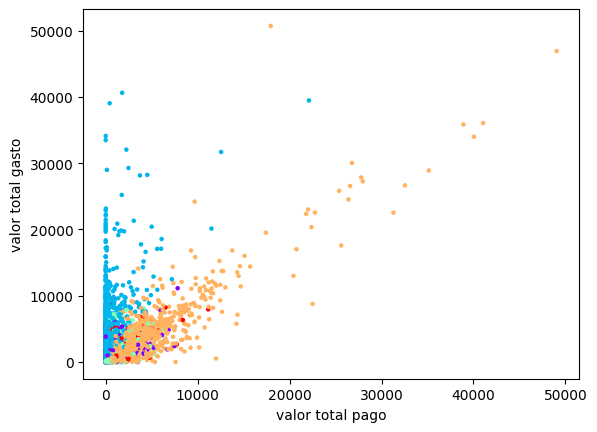

In [24]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c = labels, s=5,cmap='rainbow')
plt.xlabel('valor total pago')
plt.ylabel('valor total gasto')
plt.show

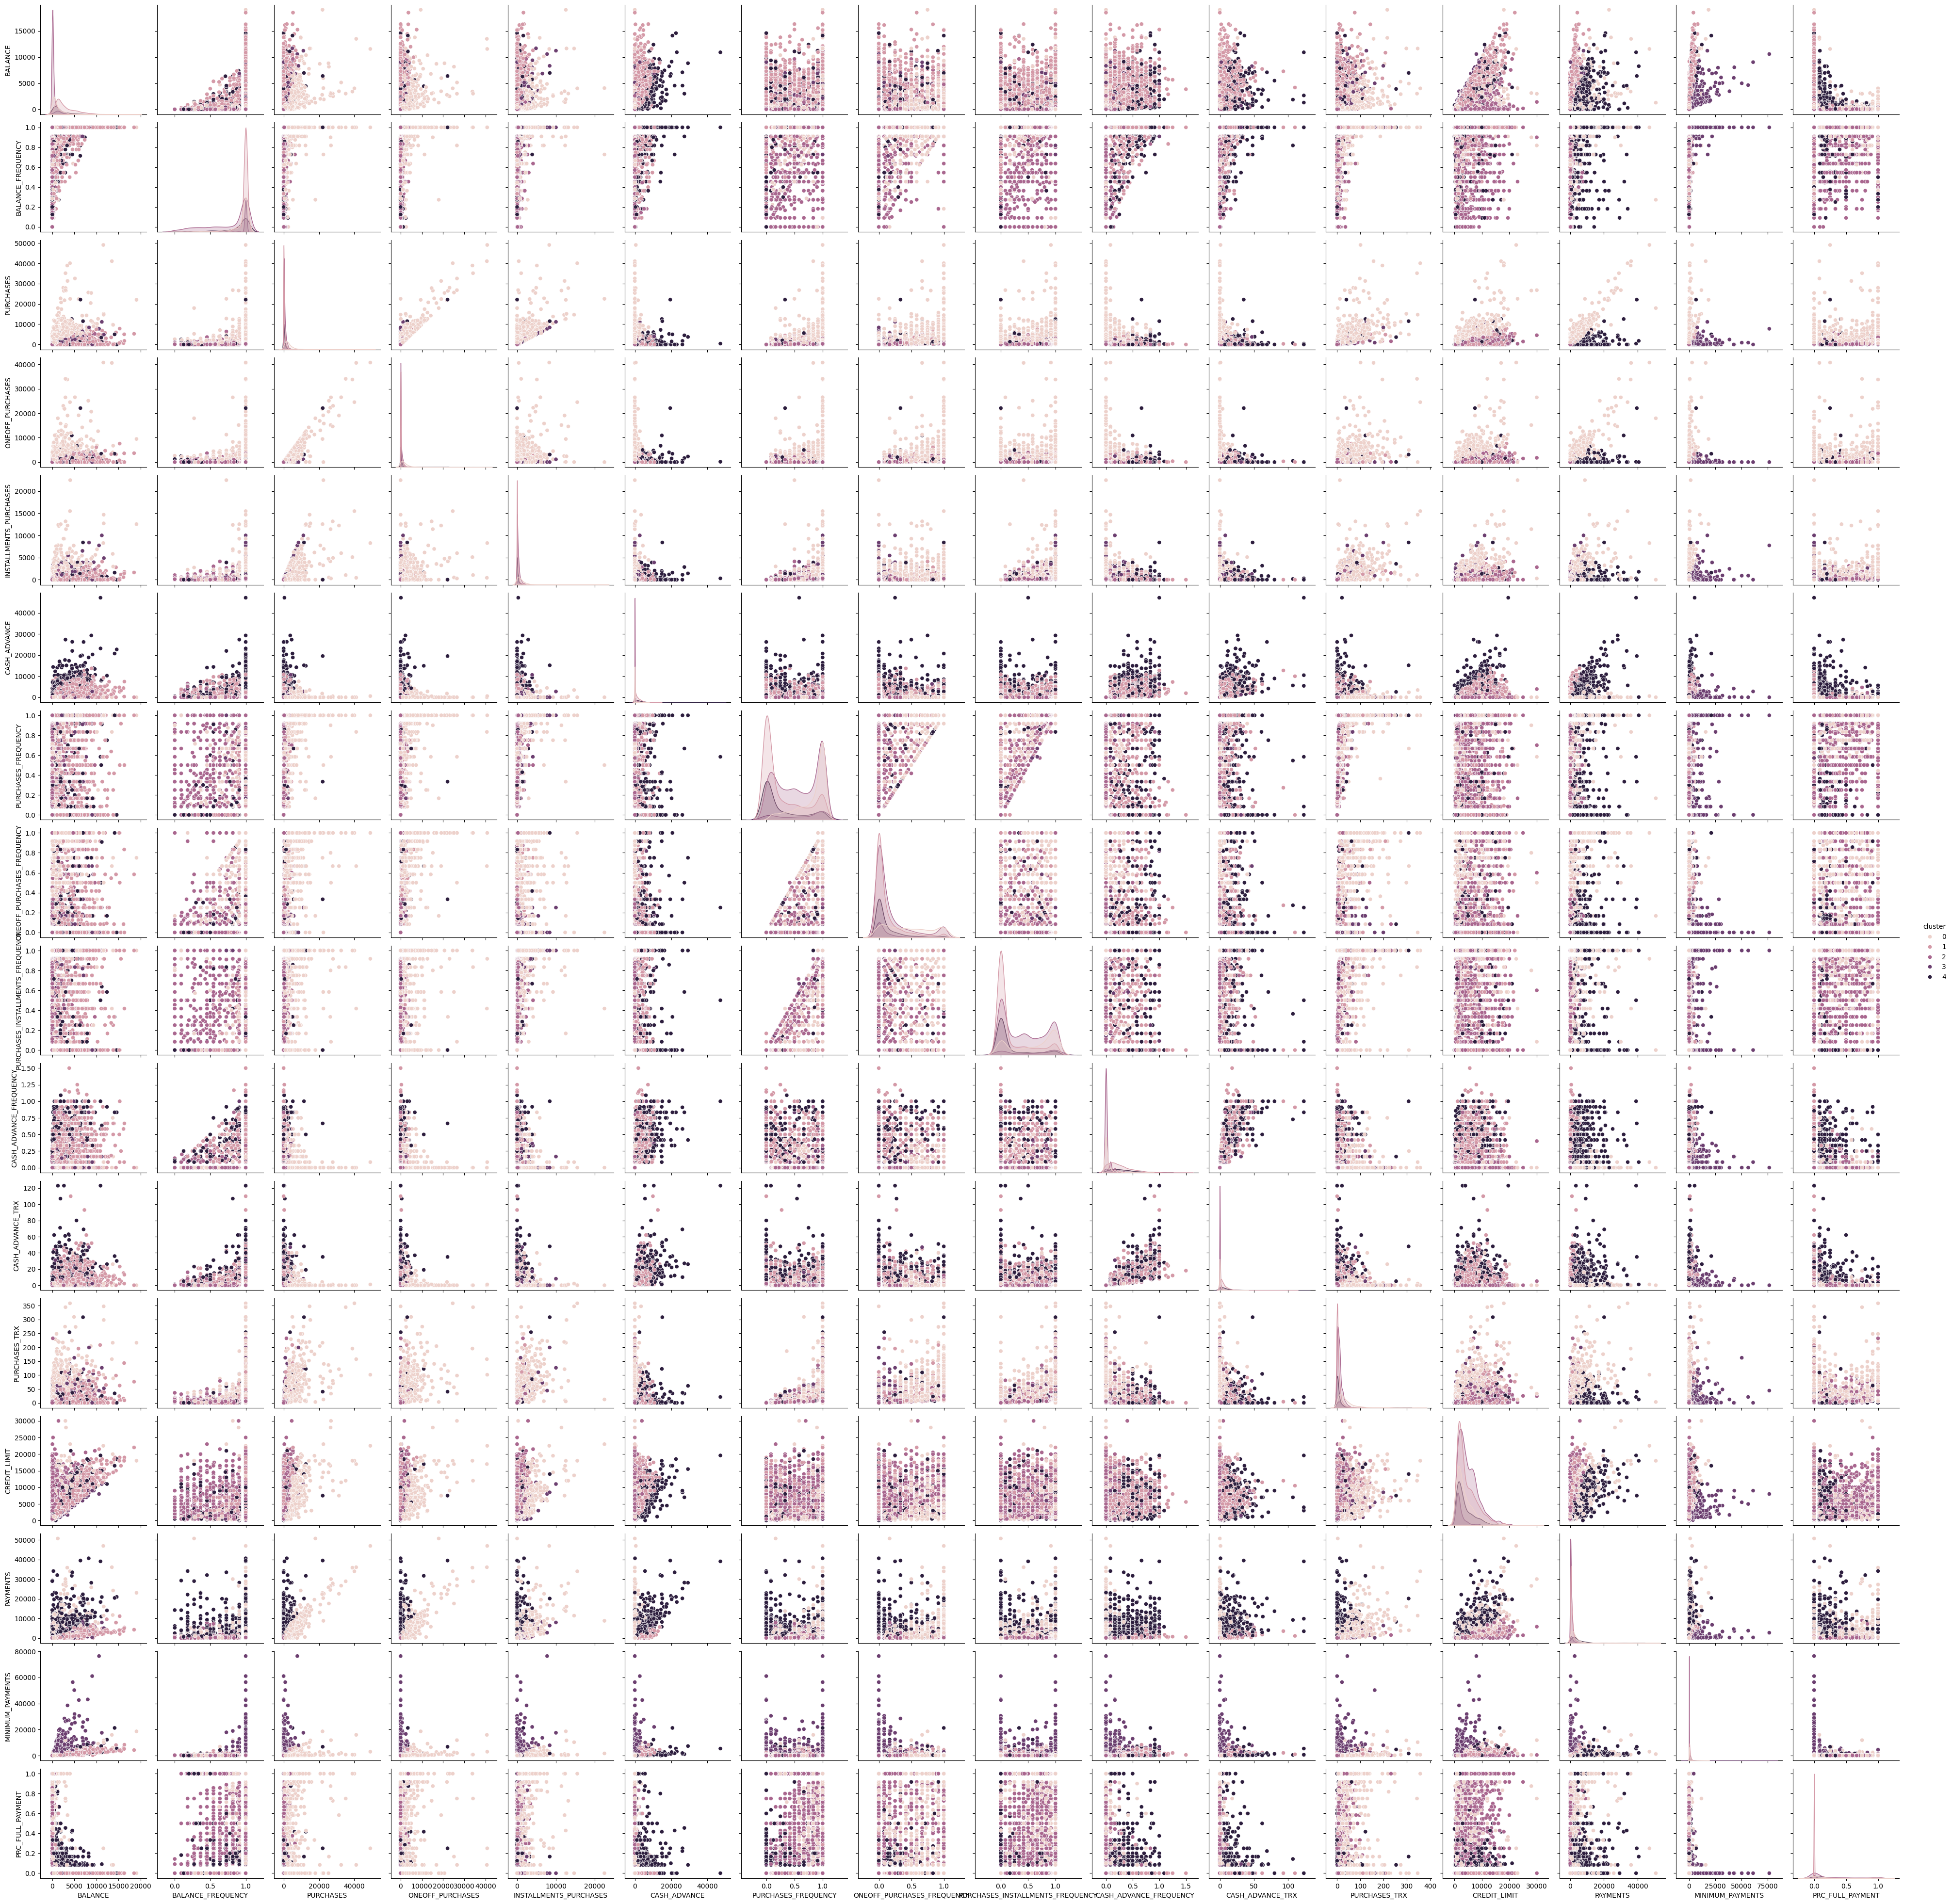

In [ ]:
# Plotando os graficos par a par
import seaborn as sns
df['cluster'] = labels
sns.pairplot(df[0:], hue='cluster')


##### Nem sempre a vizualização será possicel e a melhor maneira para a interpretação dis clusters

## Aula 8 - Entendendo os valores dos atributos no cluster

### `Descrevendo atributos`

In [26]:
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
1        1075.0  1794.243689  1980.861978   0.000000   507.620537   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3        1535.0  1142.229612  1665.393296   0.000000   212.073923   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
1        1088.056301  2310.842870  14581.459140            1075.0  0.862516   
2          82.941478   410.126095   9630.367575            3280.0  0.774389   
3         553.534453  1370.143507  19043.138560            1535.0  0.928174   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.593643   8345.641905           2649.0  0.001799   
1        ...       883.800031  21235.065300           1075.0  0.117289   
2        ...       248.733727   4483.503862           3280.0  0.246806   
3        ...       524.475206  18621.013310           1535.0  0.278458   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023260  0.0  0.0  0.000000  0.000000  0.6  
1        0.186635  0.0  0.0  0.083333  0.142857  1.0  
2        0.346748  0.0  0.0  0.000000  0.444444  1.0  
3        0.367223  0.0  0.0  0.083333  0.545455  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

### `Analisando os valores`

In [27]:
# Checar a variação dos valores de cada centroide (no olhometro)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [2.34985202e-01 2.16116336e-04 6.10950792e-02 3.48777793e-02
  2.62224951e-02 3.99528545e-01 5.27944137e-05 2.06576196e-05
  3.52637889e-05 6.53253087e-05 1.56775733e-03 1.13055837e-03
  5.35698250e-01 5.97708442e-01 1.04147601e-01 2.76781866e-05]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [1.59954746e-01 2.45570204e-04 4.38918210e-01 2.57249491e-01
  1.81840788e-01 2.53005800e-02 2.04597888e-04 8.90823196e-05
  1.50789074e-04 9.35406357e-06 1.69104232e-04 6.18003273e-03
  6.03556414e-01 4.02439454e-01 8.55118517e-02 7.20719088e-05]
 [3.

### `Selecionando os atributos`

In [28]:
max = len(centroids[0])
for i in range(max):
     print(df.columns.values[i],'\n{:.4f}'.format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [29]:
* BALANCE 0.0224
* PURCHASES 0.0196
* CASH_ADVANCE 0.0226
* CREDIT_LIMIT 0.0360
* PAYMENTS 0.0280
* MINIMUM_PAYMENTS 0.0542

SyntaxError: invalid syntax (123479976.py, line 1)

### `Filtrando Valores`

In [30]:
df.groupby('cluster')['BALANCE'].describe()

count         mean          std        min          25%  \
cluster                                                             
0        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
1        1075.0  1794.243689  1980.861978   0.000000   507.620537   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3        1535.0  1142.229612  1665.393296   0.000000   212.073923   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                 50%          75%           max  
cluster                                          
0        2174.018945  4223.867789  18495.558550  
1        1088.056301  2310.842870  14581.459140  
2          82.941478   410.126095   9630.367575  
3         553.534453  1370.143507  19043.138560  
4        1337.287314  2138.678431  11670.179850

In [32]:
description = df.groupby('cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
n_clientes = description.size()
description = description.mean()
description['n_clientes'] = n_clientes
description

BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
1        1794.243689   480.988753   3267.584685   3985.740662  4711.029169   
2         443.746756   629.249107    141.482978   5130.547795   814.294226   
3        1142.229612  3274.143199    179.088533   4095.153193  3036.228833   
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911   

         n_clientes  
cluster              
0              2649  
1              1075  
2              3280  
3              1535  
4               411

## Aula 9 - Interpretando os Clusters

In [34]:
df.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
1        1075.0  0.117289  0.186635  0.0  0.0  0.083333  0.142857  1.0
2        3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
3        1535.0  0.278458  0.367223  0.0  0.0  0.083333  0.545455  1.0
4         411.0  0.019318  0.090901  0.0  0.0  0.000000  0.000000  1.0


* CLUSTER 0: Clientes com os maiores valores em gastos. Piores pagadores. Boa quantidade de clientes

* CLUSTER 1: Clientes com o gastos medianos. Pagam as vezes. Poucos clientes

* CLUSTER 2: Clientes com os menores valores em gastos. Clientes com maior limite. Bons pagadores. Maior numero de clientes

* CLUSTER 3: Clientes com o segundo menor valor em gastos. Foco em saques, Melhores Pagadores

* CLUSTER 4: Clientes com menor limite. Não são bons pagadores. Menor quantidade de clientes